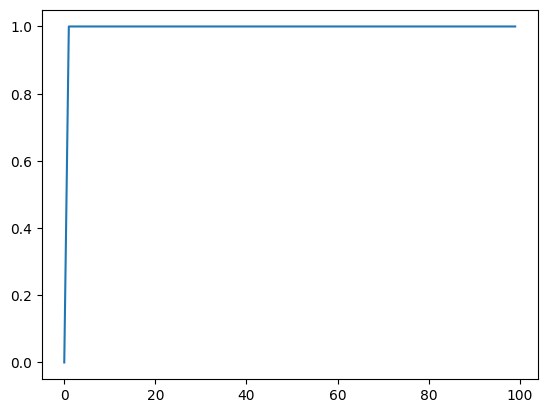

Przetworzony sygnał: [0.         0.0619     0.26412826 0.54384083 0.77335807 0.89168204
 0.90018723 0.83814496 0.75440343 0.68661151 0.65235377 0.6507164
 0.66972326 0.69478201 0.71479643 0.72470404 0.72492624 0.71911127
 0.71161629 0.70571008 0.70284804 0.70286049 0.70463727 0.70687794
 0.70862003 0.70944579 0.7094188  0.70887655 0.708207   0.7076934
 0.70745546 0.70747039 0.70763569 0.70783567 0.70798702 0.70805548
 0.708049   0.70799866 0.70793896 0.70789438 0.70787471 0.70787724
 0.70789256 0.70791037 0.70792349 0.70792914 0.70792821 0.70792355
 0.70791824 0.70791438 0.70791276 0.70791309 0.7079145  0.70791609
 0.70791722 0.70791769 0.70791757 0.70791714 0.70791667 0.70791634
 0.70791621 0.70791624 0.70791637 0.70791651 0.70791661 0.70791665
 0.70791664 0.7079166  0.70791656 0.70791653 0.70791652 0.70791652
 0.70791653 0.70791655 0.70791655 0.70791656 0.70791656 0.70791655
 0.70791655 0.70791655 0.70791654 0.70791655 0.70791655 0.70791655
 0.70791655 0.70791655 0.70791655 0.7079165

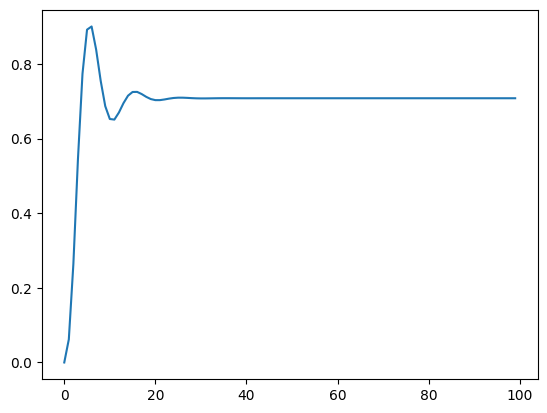

In [5]:
import numpy as np
import matplotlib.pyplot as plt

class ChebyshevType1LowPassFilter:
    def __init__(self):
        # Współczynniki licznika (b) i mianownika (a)
        self.b = [0.0619, 0.1239, 0.0619]
        self.a = [1.0000, -1.2654, 0.6153]
        
        # Bufor dla poprzednich próbek wejściowych i wyjściowych
        self.x_prev = [0.0, 0.0]  # x[n-1], x[n-2]
        self.y_prev = [0.0, 0.0]  # y[n-1], y[n-2]
    
    def process_sample(self, x):
        # Obliczanie aktualnej próbki wyjściowej
        y = (self.b[0] * x + 
             self.b[1] * self.x_prev[0] + 
             self.b[2] * self.x_prev[1] - 
             self.a[1] * self.y_prev[0] - 
             self.a[2] * self.y_prev[1]) / self.a[0]
        
        # Aktualizacja bufora
        self.x_prev[1] = self.x_prev[0]
        self.x_prev[0] = x
        
        self.y_prev[1] = self.y_prev[0]
        self.y_prev[0] = y
        
        return y
    
    def process_signal(self, signal):
        """Przetwarza cały sygnał wejściowy"""
        return np.array([self.process_sample(x) for x in signal])

# Przykład użycia:
if __name__ == "__main__":
    # Tworzenie filtra
    cheby_filter = ChebyshevType1LowPassFilter()
    
    # Przykładowy sygnał wejściowy (np. szum)
    input_signal = np.ones(100)
    input_signal[0] = 0
    
    plt.plot(input_signal)
    plt.show()
    # Filtrowanie sygnału
    output_signal = cheby_filter.process_signal(input_signal)
    plt.plot(output_signal)
    print("Przetworzony sygnał:", output_signal)